SENTIMENT ANALYSIS

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/durga/Desktop/SPU/DS 600/PROJECT/FINAL/cleaned_data.csv")

In [3]:
df.head()

,Name,Profile ID,Date,Comment,Comment_Length
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0


In [14]:
afinn = pd.read_csv("C:/Users/durga/Desktop/SPU/DS 600/PROJECT/FINAL/Afinn.csv",encoding='latin1')

In [15]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [16]:
# Define a function to perform sentiment analysis using AFINN
def afinn_sentiment(text):
    afinn_score = sum([afinn.loc[afinn['word'] == word, 'value'].iloc[0] for word in text.split() if word in afinn['word'].values])
    return "positive" if afinn_score > 0 else "negative" if afinn_score < 0 else "neutral"

# Apply the sentiment analysis function to your DataFrame
df['AFINN_Sentiment'] = df['Comment'].apply(afinn_sentiment)

In [17]:
df.head()

,Name,Profile ID,Date,Comment,Comment_Length,AFINN_Sentiment
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0,neutral
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0,neutral
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0,positive
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0,negative
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0,neutral


In [18]:
df.head(n=30)

,Name,Profile ID,Date,Comment,Comment_Length,AFINN_Sentiment
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0,neutral
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0,neutral
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0,positive
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0,negative
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0,neutral
5,pkkw777,6.329501e+09,22/04/24 19:27:03,t shirt though,23.0,neutral
6,schnopp77,5.894240e+09,22/04/24 19:27:32,yeah boy tysons gonna get shit done goat,49.0,negative
7,kryztaf0,4.992125e+10,22/04/24 19:40:16,please win mike,15.0,positive
8,lujackson_0,9.054607e+08,22/04/24 19:56:57,want t shirt,23.0,positive
9,iiithomaspeterson,6.998862e+09,22/04/24 19:58:02,love shirt,15.0,positive


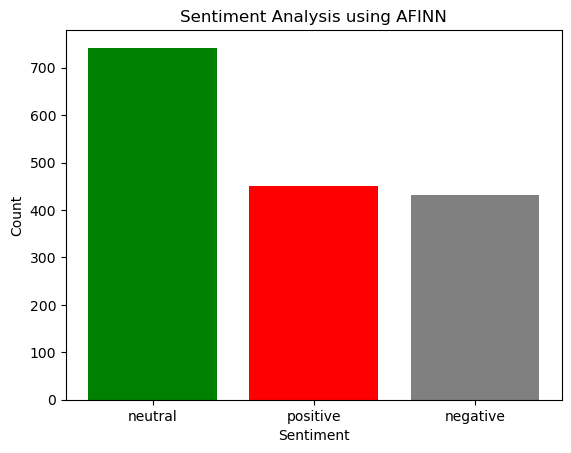

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['AFINN_Sentiment'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis using AFINN')
plt.show()